In [34]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [294]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# 输入图像的维度，此处是mnist图像，因此是28*28
img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = (2,2)
# 卷积核的大小
kernel_size = (3,3)
# keras中的mnist数据集已经被划分成了60,000个训练集，10,000个测试集的形式，按以下格式调用即可
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 后端使用tensorflow时，即tf模式下，
# 会将100张RGB三通道的16*32彩色图表示为(100,16,32,3)，
# 第一个维度是样本维，表示样本的数目，
# 第二和第三个维度是高和宽，
# 最后一个维度是通道维，表示颜色通道数
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
# 将X_train, X_test的数据格式转为float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归一化
X_train /= 255
X_test /= 255
# 打印出相关信息
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# 将类别向量(从0到nb_classes的整数向量)映射为二值类别矩阵，
# 相当于将向量用one-hot重新编码
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [295]:
# 输入图像的维度，此处是mnist图像，因此是28*28
img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = (2,2)
# 卷积核的大小
kernel_size = (3,3)

input_shape = (img_rows, img_cols,1)

In [296]:
# 建立序贯模型
model = Sequential()

# 卷积层，对二维输入进行滑动窗卷积
# 当使用该层为第一层时，应提供input_shape参数，在tf模式中，通道维位于第三个位置
# border_mode：边界模式，为"valid","same"或"full"，即图像外的边缘点是补0
# 还是补成相同像素，或者是补1
cnn2d = Convolution2D(nb_filters, (kernel_size[0] ,kernel_size[1]),
                        padding='valid',
                        input_shape=input_shape)

model.add(cnn2d)
model.add(Activation('relu'))

# 卷积层，激活函数是ReLu
model.add(Convolution2D(nb_filters, (kernel_size[0], kernel_size[1])))
model.add(Activation('relu'))

# 池化层，选用Maxpooling，给定pool_size，dropout比例为0.25
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Flatten层，把多维输入进行一维化，常用在卷积层到全连接层的过渡
model.add(Flatten())

# 包含128个神经元的全连接层，激活函数为ReLu，dropout比例为0.5
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 包含10个神经元的输出层，激活函数为Softmax
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# 输出模型的参数信息
model.summary()
# 配置模型的学习过程
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
__________

In [297]:
# 训练模型
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

# 按batch计算在某些输入数据上模型的误差
score = model.evaluate(X_test, Y_test, verbose=0)

# 输出训练好的模型在测试集上的表现
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 59s 990us/step - loss: 0.2511 - acc: 0.9224 - val_loss: 0.0556 - val_acc: 0.9812
Epoch 2/5
60000/60000 [==============================] - 57s 956us/step - loss: 0.0807 - acc: 0.9756 - val_loss: 0.0434 - val_acc: 0.9863
Epoch 3/5
60000/60000 [==============================] - 57s 957us/step - loss: 0.0606 - acc: 0.9813 - val_loss: 0.0332 - val_acc: 0.9885
Epoch 4/5
60000/60000 [==============================] - 58s 958us/step - loss: 0.0487 - acc: 0.9856 - val_loss: 0.0317 - val_acc: 0.9888
Epoch 5/5
60000/60000 [==============================] - 58s 961us/step - loss: 0.0408 - acc: 0.9873 - val_loss: 0.0285 - val_acc: 0.9900
Test score: 0.028479541181004608
Test accuracy: 0.99


In [298]:
score = model.evaluate(X_train, Y_train, verbose=0)

# 输出训练好的模型在测试集上的表现
print('X_train score:', score[0])
print('Test accuracy:', score[1])

X_train score: 0.0171022440701791
Test accuracy: 0.9950333333333333


In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
print(cnn2d.get_weights()[0].shape)

(3, 3, 1, 32)


In [159]:
from keras import models
import imageio
from keras.preprocessing import image
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

(1, 28, 28, 1)
(1, 26, 26, 32)


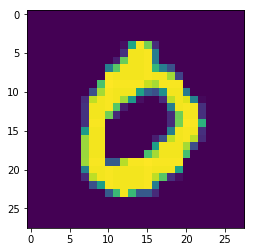

In [187]:
# img_path = '../2019-02-21/my_own_images/9.png'
# img = image.load_img(img_path, target_size=(28, 28),color_mode="grayscale")
img = x_test[3].reshape(28,28)
plt.imshow(img)
# img_tensor = image.img_to_array(img)
img_tensor = img
img_tensor = img_tensor[:,:,np.newaxis]
img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor = img_tensor[:,:,:,np.newaxis]
img_tensor /= 255.
print(img_tensor.shape)
# plt.imshow(img_tensor)
# plt.show()

activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation
print(activations[1].shape)

(1, 26, 26, 32)


IndexError: too many indices for array

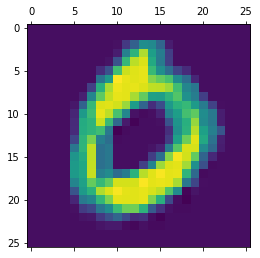

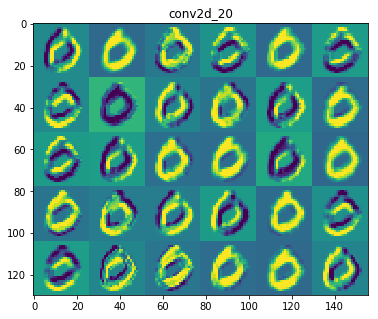

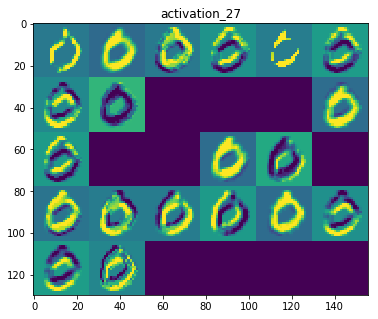

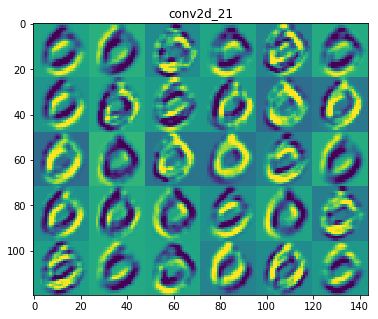

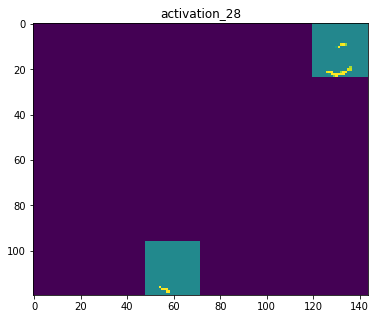

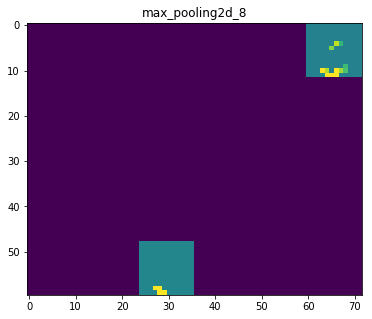

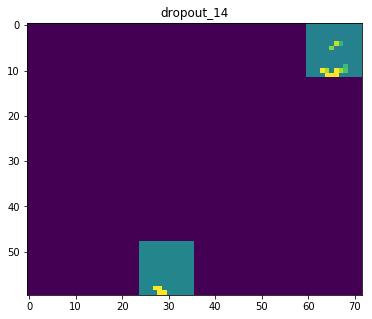

In [208]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 6

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            a = layer_activation[0,:, :, col * images_per_row + row]
#             plt.imshow(layer_activation[0,:, :, col * images_per_row + row])
            channel_image = a
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

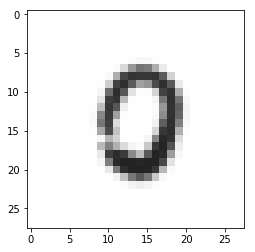

实际是0	神经网络认为是 0	概率 0.85087216
(1, 10)


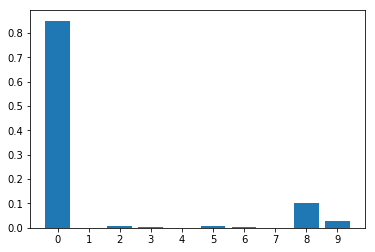

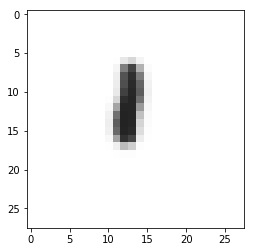

实际是1	神经网络认为是 0	概率 0.8195523
(1, 10)


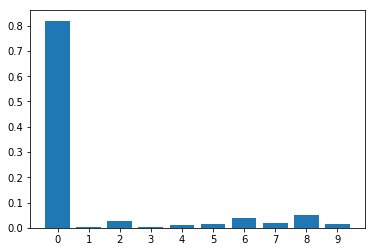

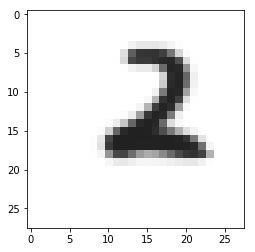

实际是2	神经网络认为是 2	概率 0.5396125
(1, 10)


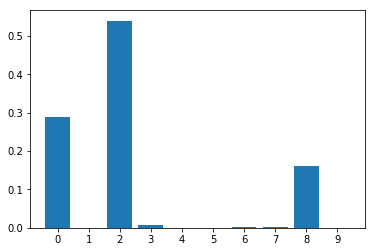

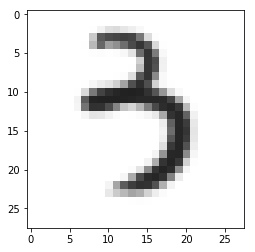

实际是3	神经网络认为是 2	概率 0.46466205
(1, 10)


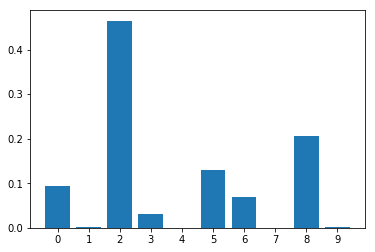

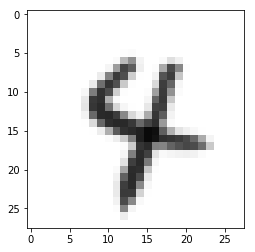

实际是4	神经网络认为是 8	概率 0.86541164
(1, 10)


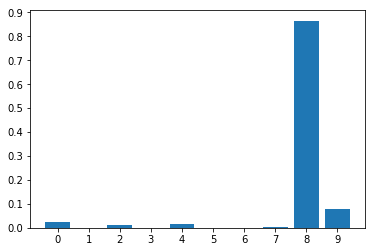

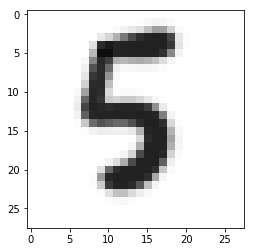

实际是5	神经网络认为是 5	概率 0.7517786
(1, 10)


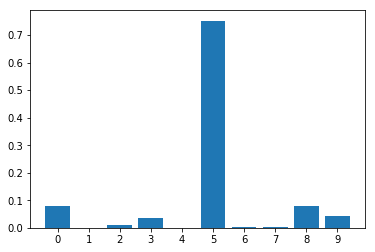

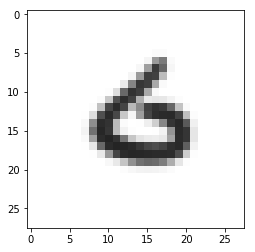

实际是6	神经网络认为是 3	概率 0.6198405
(1, 10)


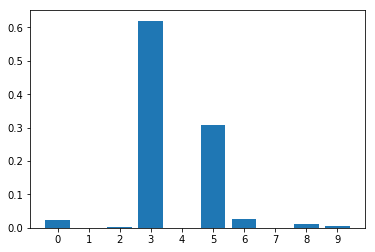

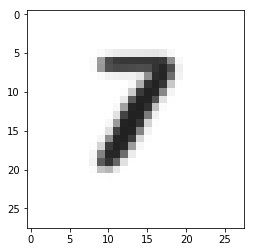

实际是7	神经网络认为是 0	概率 0.4432906
(1, 10)


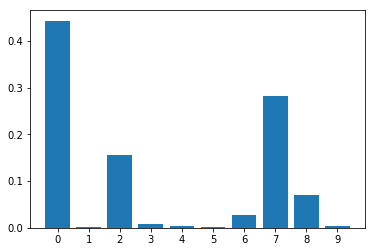

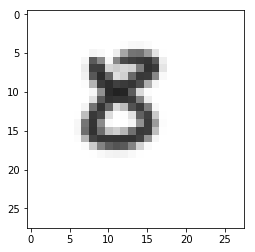

实际是8	神经网络认为是 2	概率 0.41039866
(1, 10)


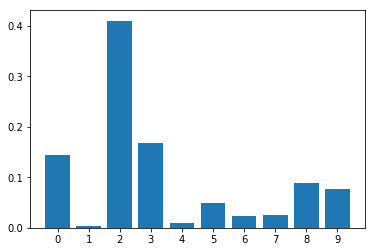

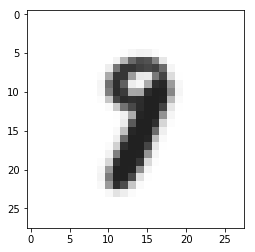

实际是9	神经网络认为是 0	概率 0.95280427
(1, 10)


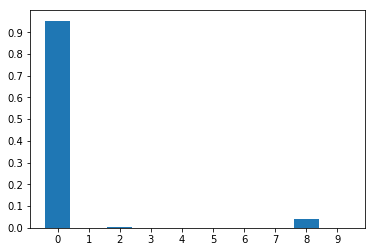

In [299]:


m_test = []
m_label = []
for i in range(10):
    img_path = '../2019-02-21/my_own_images/%s.png' % (i)
    img = image.load_img(img_path, target_size=(28, 28),color_mode="grayscale")
    img_tensor = image.img_to_array(img)
    plt.imshow(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
#     print(img_tensor.shape)
    m_test.append(img_tensor)
    label_arr = np.zeros(10)
    label_arr[i] = 1
    m_label.append(label_arr)
#     plt.imshow(img_tensor.reshape((28,28)))
#     plt.show()
#     print(img_tensor.reshape((28,28)))
    r = model.predict(img_tensor)
#     print(r)
#     plt.matshow(r)
    plt.show()
    print('实际是%s\t神经网络认为是 %s\t概率 %s' % (i,np.argmax(r),np.max(r)))
#     r = np.expand_dims(r, axis=0)
    print(r.shape)
    plt.xticks(np.arange(0,10,1))
    plt.yticks(np.arange(0,1,0.1))
#     plt.matshow(r)
    plt.bar(np.arange(0,10,1),r[0])
    plt.show()
    
m_test = np.asarray(m_test)
m_label = np.asarray(m_label)

# print(Y_test[0])
# print(m_label[0])
# print(X_test.shape)
# print(m_test.shape)
# plt.imshow(X_test[1000].reshape(28,28))

In [263]:
score = model.evaluate(m_test, m_label, verbose=0)
print('m_test accuracy:', score[1],score[0])

m_test accuracy: 0.30000001192092896 2.5970354080200195
